# K-Means Clustering

This notebook provides an example code of splitting wine buyers into clusters based on the information about the offers they accepted. We will work with 2 datasets, one describes the overall transcations by different customers, the offers they accepted and the offer information. The second one includes information on accepted offers-if the offer was accepted, it is 1, if no-it is 0.

The general sequence of steps that we will follow is the following:

- Data manipulation
    - reading and understanding the data
- Model construction and interpretation
    - Model 1: K-Means model with k number of clusters defined by ourselves
    - Elbow Method to decide the optimal k
    - Silhouette Method to decide the optimal k
    - Model 2: K-Means model with the optimal k
    - Joining final clusters to the data and getting insights using groupby and aggregation

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scikitplot.cluster import plot_elbow_curve

In [3]:
url1="https://raw.githubusercontent.com/srbuhimirzoyan/Business_Analytics_Spring2020/master/Session_10_KMeans_Wine_data_customers.xlsx"
url2="https://raw.githubusercontent.com/srbuhimirzoyan/Business_Analytics_Spring2020/master/Session_10_KMeans_Wine_data_transactions.xlsx"

In [4]:
data=pd.read_excel(url1)
transactions=pd.read_excel(url2)

In [5]:
#we have information about 32 offers of 100 customers. In case the offer was accepted, the value under respective column is 1,
#otherwise 0
data.head()

,Customer_Names,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,Offer_7,Offer_8,Offer_9,...,Offer_23,Offer_24,Offer_25,Offer_26,Offer_27,Offer_28,Offer_29,Offer_30,Offer_31,Offer_32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
#lets also see the info on transactions
transactions.head()

,Customer_Names,Offer #,Gender,Discount,Varietal,Origin
0,Smith,2,Male,17,Pinot Noir,France
1,Smith,24,Male,34,Pinot Noir,Italy
2,Johnson,17,Male,47,Pinot Noir,Germany
3,Johnson,24,Male,34,Pinot Noir,Italy
4,Johnson,26,Male,83,Pinot Noir,Australia


In [7]:
transactions[transactions["Offer #"]==2]

,Customer_Names,Offer #,Gender,Discount,Varietal,Origin
0,Smith,2,Male,17,Pinot Noir,France
24,Rodriguez,2,Female,17,Pinot Noir,France
47,Martin,2,Male,17,Pinot Noir,France
51,Jackson,2,Male,17,Pinot Noir,France
139,Campbell,2,Male,17,Pinot Noir,France
143,Mitchell,2,Male,17,Pinot Noir,France
192,Peterson,2,Female,17,Pinot Noir,France
205,Bell,2,Female,17,Pinot Noir,France
221,Cox,2,Female,17,Pinot Noir,France
318,Fisher,2,Female,17,Pinot Noir,France


In [8]:
#For analysis lets remove customer names from the offer info
data_2=data.iloc[:,1:]

In [9]:
#lets build first with 5 clusters
model1_cluster = KMeans(5,random_state=42)

In [10]:
model1_cluster.fit_predict(X=data_2)

array([1, 0, 4, 1, 0, 2, 4, 1, 2, 1, 2, 4, 1, 0, 1, 4, 0, 4, 1, 2, 1, 1,
       2, 2, 4, 3, 3, 0, 0, 4, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 4, 4, 1, 0,
       1, 2, 1, 1, 0, 0, 0, 3, 4, 4, 2, 1, 4, 1, 1, 0, 0, 1, 0, 1, 1, 4,
       4, 0, 2, 0, 3, 0, 2, 1, 0, 1, 4, 2, 1, 4, 3, 0, 3, 4, 1, 1, 1, 3,
       0, 1, 0, 1, 0, 1, 3, 2, 1, 3, 0, 2])

In [11]:
#let's get values of cluster centers
model1_cluster.cluster_centers_

array([[ 4.54545455e-02,  4.54545455e-02,  4.54545455e-02,
         3.18181818e-01,  9.09090909e-02,  1.81818182e-01,
         4.54545455e-02,  4.54545455e-02,  3.18181818e-01,
         4.54545455e-02,  2.72727273e-01,  4.54545455e-02,
        -3.46944695e-17, -2.77555756e-17,  4.54545455e-02,
         1.81818182e-01, -4.16333634e-17, -8.32667268e-17,
         9.09090909e-02,  2.27272727e-01,  4.54545455e-02,
         0.00000000e+00,  4.54545455e-02, -6.93889390e-17,
         1.81818182e-01,  4.54545455e-02,  1.81818182e-01,
         1.36363636e-01,  4.54545455e-02,  4.54545455e-02,
         4.09090909e-01,  1.36363636e-01],
       [-4.16333634e-17, -4.16333634e-17,  2.85714286e-02,
        -8.32667268e-17, -1.38777878e-17,  2.85714286e-02,
         4.28571429e-01,  4.57142857e-01, -4.16333634e-17,
         5.71428571e-02,  2.85714286e-02,  2.85714286e-02,
         1.71428571e-01,  2.77555756e-17, -4.16333634e-17,
        -2.08166817e-17,  0.00000000e+00,  3.71428571e-01,
        -2.08

In [12]:
#let's see Sum of squared distances of samples to their closest cluster center. The smaller the number the better
model1_cluster.inertia_

203.76651387827857

# Elbow Method

Let's see the optimal number of clusters based on  SSE. There is a method to choose optimal value of k (number of clusters). The method is called elbow method. 

In [13]:
sse={}
for k in range(1,11):
    cluster_wine=KMeans(k,random_state=42)
    cluster_wine.fit_predict(data_2)
    sse[k] = cluster_wine.inertia_ #Sum of squared distances of samples to their closest cluster center, 
                                        #other measures of distances can also be taken
        
#lets see what sse contains
print(sse)

{1: 281.9, 2: 251.46031746031744, 3: 228.3105506822612, 4: 216.95436507936506, 5: 203.76651387827857, 6: 195.38591269841268, 7: 187.12400779045515, 8: 178.82063492063492, 9: 171.77997835497837, 10: 164.792316017316}


In [14]:
sse.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

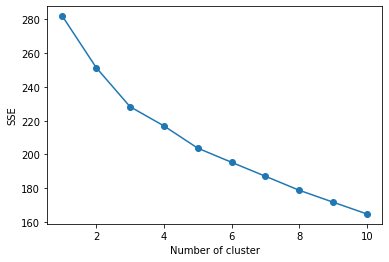

In [16]:
#let's visualize SSE values for 10 values of k - Elbow Curve
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()), marker="o") #sse is dictionary 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Now let's just use <code>plot_elbow_curve()</code> function to plot elbow curve!

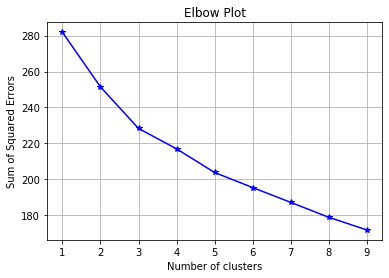

In [17]:
plot_elbow_curve(KMeans(random_state=42),data_2,cluster_ranges=range(1,10),show_cluster_time=False)
plt.show()

<b>It seems that 4 is an optimal value for k. However as the elbow plot is not broken enough at that point, it's difficult to choose optimal k from this elbow plot.</b>

# Silhouette score method

    Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

In [18]:
sil_coef={}
for k in range (2,11): 
    cluster_wine=KMeans(k,random_state=42)
    cluster_wine.fit_predict(data_2)
    sil_coef[k]=silhouette_score(data_2,cluster_wine.labels_,metric='euclidean')

#Higher Silhouette Coefficient score relates to a model with better defined clusters
print(sil_coef)

{2: 0.09174871508750351, 3: 0.11542407037894219, 4: 0.09670258360693122, 5: 0.14531568820332333, 6: 0.13313126627114877, 7: 0.13073950771832585, 8: 0.12397572901124844, 9: 0.1202465110942483, 10: 0.12695143123424532}


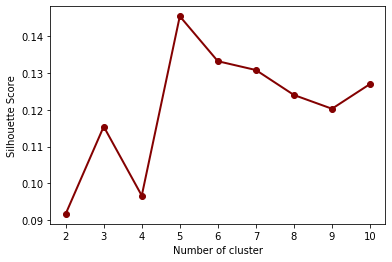

In [19]:
plt.figure()
plt.plot(list(sil_coef.keys()),list(sil_coef.values()), color='#840101',linewidth=2,marker='o') #sse is dictionary, plotting 
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

# Final Model based on the optimal K

In [20]:
#let's add cluster labels to our original data
cluster_final=KMeans(5,random_state=42)
data["cluster_final"]=cluster_final.fit_predict(data_2)

In [21]:
data.head()

,Customer_Names,Offer_1,Offer_2,Offer_3,Offer_4,Offer_5,Offer_6,Offer_7,Offer_8,Offer_9,...,Offer_24,Offer_25,Offer_26,Offer_27,Offer_28,Offer_29,Offer_30,Offer_31,Offer_32,cluster_final
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,4
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# quickly count the number of customers in each cluster
data.cluster_final.value_counts()

1    35
0    22
4    17
2    17
3     9
Name: cluster_final, dtype: int64

<b> The biggest cluster is the second one (with label 1). </b>

# Now let's combine two datasets into one to perform the anlaysis

In [24]:
#We have customer names and can merge using that column
transactions

,Customer_Names,Offer #,Gender,Discount,Varietal,Origin
0,Smith,2,Male,17,Pinot Noir,France
1,Smith,24,Male,34,Pinot Noir,Italy
2,Johnson,17,Male,47,Pinot Noir,Germany
3,Johnson,24,Male,34,Pinot Noir,Italy
4,Johnson,26,Male,83,Pinot Noir,Australia
...,...,...,...,...,...,...
319,Fisher,11,Female,85,Champagne,France
320,Fisher,22,Female,63,Champagne,France
321,Fisher,28,Female,56,Cabernet Sauvignon,France
322,Fisher,30,Female,54,Malbec,France


In [25]:
final_data=pd.merge(transactions,data[["Customer_Names","cluster_final"]], on="Customer_Names")

In [26]:
final_data

,Customer_Names,Offer #,Gender,Discount,Varietal,Origin,cluster_final
0,Smith,2,Male,17,Pinot Noir,France,4
1,Smith,24,Male,34,Pinot Noir,Italy,4
2,Johnson,17,Male,47,Pinot Noir,Germany,4
3,Johnson,24,Male,34,Pinot Noir,Italy,4
4,Johnson,26,Male,83,Pinot Noir,Australia,4
...,...,...,...,...,...,...,...
319,Fisher,11,Female,85,Champagne,France,2
320,Fisher,22,Female,63,Champagne,France,2
321,Fisher,28,Female,56,Cabernet Sauvignon,France,2
322,Fisher,30,Female,54,Malbec,France,2


In [27]:
#Mean discount by clusters
final_data.groupby("cluster_final")["Discount"].mean()

cluster_final
0    67.397260
1    55.673913
2    61.459459
3    59.200000
4    51.422222
Name: Discount, dtype: float64

In [28]:
final_data

,Customer_Names,Offer #,Gender,Discount,Varietal,Origin,cluster_final
0,Smith,2,Male,17,Pinot Noir,France,4
1,Smith,24,Male,34,Pinot Noir,Italy,4
2,Johnson,17,Male,47,Pinot Noir,Germany,4
3,Johnson,24,Male,34,Pinot Noir,Italy,4
4,Johnson,26,Male,83,Pinot Noir,Australia,4
...,...,...,...,...,...,...,...
319,Fisher,11,Female,85,Champagne,France,2
320,Fisher,22,Female,63,Champagne,France,2
321,Fisher,28,Female,56,Cabernet Sauvignon,France,2
322,Fisher,30,Female,54,Malbec,France,2


A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.
"https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html"

In [31]:
#Customers that accepted most offers
final_data.groupby("Customer_Names")["Offer #"].count().sort_values(ascending=False).head(10)

Customer_Names
Sanders     9
Fisher      7
Sanchez     7
Miller      7
Young       6
Harris      6
Morales     6
Rogers      6
Peterson    6
Thomas      6
Name: Offer #, dtype: int64

In [32]:
#number of males and females by cluster
final_data.groupby(["cluster_final","Gender"]).agg("count")['Customer_Names']

cluster_final  Gender
0              Female    32
               Male      41
1              Female    47
               Male      45
2              Female    42
               Male      32
3              Female    17
               Male      23
4              Female    24
               Male      21
Name: Customer_Names, dtype: int64

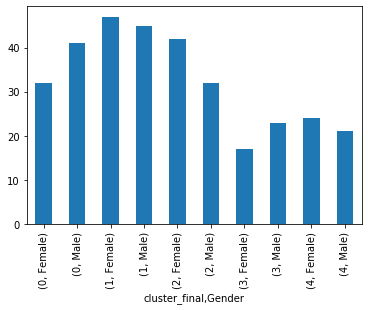

In [33]:
final_data.groupby(["cluster_final","Gender"]).agg("count")['Customer_Names'].plot(kind='bar')

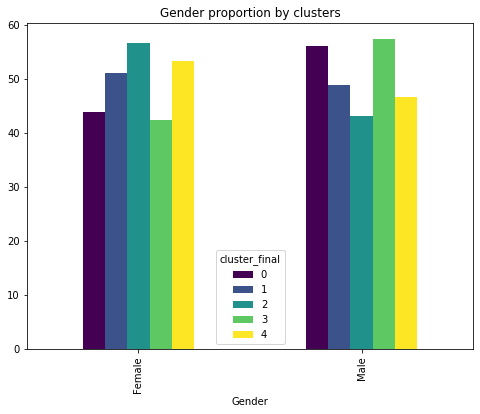

In [38]:
gender_prop=final_data.groupby(["cluster_final","Gender"]).agg("count")['Customer_Names'].groupby(level=0).transform(lambda x: (x/x.sum())*100)
gender_prop.unstack(level=0).plot(kind="bar", figsize=(8,6), colormap="viridis")
plt.title("Gender proportion by clusters")
plt.show()

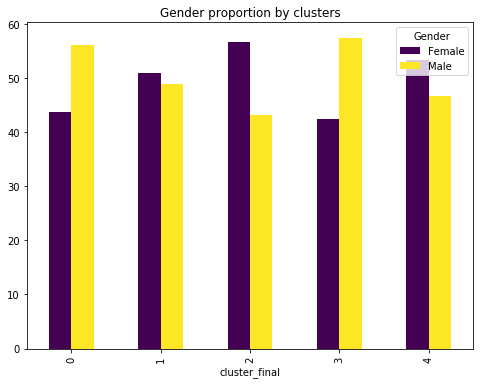

In [39]:
gender_prop.unstack(level=1).plot(kind="bar", figsize=(8,6), colormap="viridis")
plt.title("Gender proportion by clusters")
plt.show()

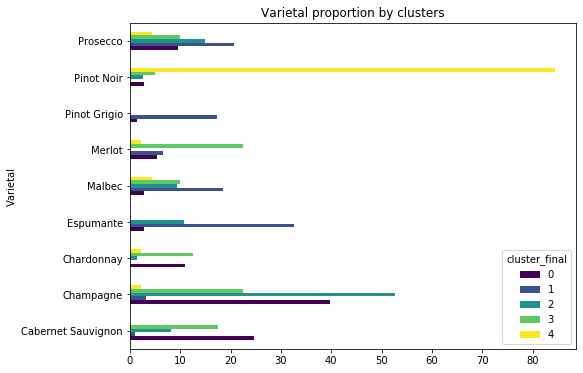

In [40]:
final_data.groupby(["cluster_final","Varietal"])["Varietal"].count().unstack(level=0).transform(lambda x:x/x.sum()*100).plot(kind="barh", figsize=(8,6), colormap="viridis")
plt.title("Varietal proportion by clusters")
plt.show()

In [44]:
#let's group by cluster, varietal and gender
winegender=final_data.groupby(["cluster_final","Varietal","Gender"]).size().unstack("Gender",).fillna(0).unstack("cluster_final").transform(lambda x:x/x.sum()*100).fillna(0)

In [45]:
winegender

Gender              Female                                              \
cluster_final            0          1          2          3          4   
Varietal                                                                 
Cabernet Sauvignon  37.500   0.000000   4.761905   5.882353   0.000000   
Champagne           31.250   2.127660  50.000000  23.529412   4.166667   
Chardonnay           9.375   0.000000   0.000000  17.647059   4.166667   
Espumante            0.000  36.170213  14.285714   0.000000   0.000000   
Malbec               3.125  14.893617  14.285714  17.647059   4.166667   
Merlot               6.250   6.382979   0.000000  23.529412   4.166667   
Pinot Grigio         3.125  14.893617   0.000000   0.000000   0.000000   
Pinot Noir           3.125   0.000000   2.380952   5.882353  75.000000   
Prosecco             6.250  25.531915  14.285714   5.882353   8.333333   

Gender                   Male                                           
cluster_final               0          1       2          3          4  
Varietal                                                                
Cabernet Sauvignon  14.634146   2.222222  12.500  26.086957   0.000000  
Champagne           46.341463   4.444444  56.250  21.739130   0.000000  
Chardonnay          12.195122   0.000000   3.125   8.695652   0.000000  
Espumante            4.878049  28.888889   6.250   0.000000   0.000000  
Malbec               2.439024  22.222222   3.125   4.347826   4.761905  
Merlot               4.878049   6.666667   0.000  21.739130   0.000000  
Pinot Grigio         0.000000  20.000000   0.000   0.000000   0.000000  
Pinot Noir           2.439024   0.000000   3.125   4.347826  95.238095  
Prosecco            12.195122  15.555556  15.625  13.043478   0.000000

In [65]:
just=final_data.groupby(["cluster_final","Varietal","Gender"]).size().unstack("Gender",).fillna(0).unstack("cluster_final")

In [66]:
just

Gender             Female                   Male                  
cluster_final           0     1     2    3     0     1     2     3
Varietal                                                          
Cabernet Sauvignon    6.0   9.0   NaN  0.0   4.0  12.0   NaN   1.0
Champagne            12.0  24.0   1.0  0.0  11.0  32.0   0.0   1.0
Chardonnay            2.0   4.0   1.0  0.0   4.0   3.0   0.0   1.0
Espumante            13.0   3.0   NaN  7.0   5.0   2.0   NaN  10.0
Malbec                NaN  10.0   1.0  7.0   NaN   2.0   1.0  11.0
Merlot                4.0   4.0   NaN  2.0   2.0   4.0   NaN   4.0
Pinot Grigio          3.0   1.0   NaN  4.0   2.0   0.0   NaN   7.0
Pinot Noir            1.0   3.0  17.0  NaN   0.0   3.0  20.0   NaN
Prosecco             13.0   5.0   1.0  4.0   7.0   8.0   0.0   5.0

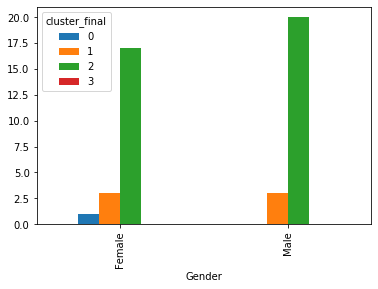

In [67]:
just.xs("Pinot Noir").unstack().plot(kind="bar")
plt.show()